In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('repair2.csv')

# 날짜 형식 변환
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce')

# 1970년 데이터만 추출
df['year'] = df['datetime'].dt.year
df2 = df[df['year'] == 1970].sort_values(['caseID', 'datetime', 'taskID']).reset_index(drop=True)

df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12383 entries, 0 to 12382
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               12383 non-null  int64         
 1   taskID               12381 non-null  object        
 2   originator           12381 non-null  object        
 3   eventtype            12379 non-null  object        
 4   contact              946 non-null    object        
 5   RepairType           853 non-null    object        
 6   objectKey            853 non-null    float64       
 7   RepairInternally     869 non-null    object        
 8   EstimatedRepairTime  869 non-null    float64       
 9   RepairCode           869 non-null    float64       
 10  RepairOK             1728 non-null   object        
 11  date                 12383 non-null  object        
 12  time                 12383 non-null  object        
 13  datetime             12383 non-

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime,year
0,1,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:08,1970-01-02 08:08:00,1970.0
1,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:11,1970-01-02 08:11:00,1970.0
2,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02,8:11,1970-01-02 08:11:00,1970.0
3,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16,1970-01-02 08:16:00,1970.0
4,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16,1970-01-02 08:16:00,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12378,1000,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,14:34,1970-01-19 14:34:00,1970.0
12379,1000,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,18:34,1970-01-19 18:34:00,1970.0
12380,1000,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-19,18:34,1970-01-19 18:34:00,1970.0
12381,1000,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20,2:25,1970-01-20 02:25:00,1970.0


### 1. 결측치 확인
- contact, RepairType, objectKey, RepairInternally, EstimatedRepairTime, RepairCode, RepairOK 컬럼에 결측치가 많은 이유 탐색

In [132]:
def show_value_counts(task, col):
    print(df2[df2['taskID'] == task]['eventtype'].value_counts())
    print(df2[df2[col].isna() == False][['taskID', 'eventtype']].value_counts())

- contact (taskID가 FirstContact일때만 값이 존재하는 것으로 추정)
    - contact는 complete 이벤트 밖에 없고 총 개수는 945개
    - FirstContact이면서 complete인 경우가 945개
    - 따라서 contact 컬럼은 FirstContact일때만 값이 존재

In [134]:
show_value_counts('FirstContact', 'contact')

eventtype
complete    945
Name: count, dtype: int64
taskID        eventtype
FirstContact  complete     945
Name: count, dtype: int64


- RepairType (taskID가 MakeTicket일때만 값이 존재하는 것으로 추정)
    - RepairType은 start와 complete로 나뉘어 있음
    - MakeTicket이면서 complete인 경우가 853개
    - 따라서 RepairType은 MakeTicket이 complete일때만 존재

In [135]:
show_value_counts('MakeTicket', 'RepairType')

eventtype
start       867
complete    853
Name: count, dtype: int64
taskID      eventtype
MakeTicket  complete     853
Name: count, dtype: int64


- objectKey (taskID가 MakeTicket일때만 값이 존재하는 것으로 추정)
    - objectKey는 start와 complete로 나뉘어 있음
    - MakeTicket이면서 complete인 경우가 853개
    - 따라서 objectKey는 MakeTicket이 complete일때만 존재

In [136]:
show_value_counts('MakeTicket', 'objectKey')

eventtype
start       867
complete    853
Name: count, dtype: int64
taskID      eventtype
MakeTicket  complete     853
Name: count, dtype: int64


- RepairInternally (taskID가 Survey일때만 값이 존재하는 것으로 추정)
    - RepairInternally는 start와 complete로 나뉘어 있음
    - Survey이면서 complete인 경우가 868개
    - 따라서 RepairInternally는 Survey가 complete일때만 존재

In [137]:
show_value_counts('Survey', 'RepairInternally')

eventtype
complete    868
start       864
Name: count, dtype: int64
taskID  eventtype
Survey  complete     868
Name: count, dtype: int64


- EstimatedRepairTime (taskID가 Survey일때만 값이 존재하는 것으로 추정)
    - EstimatedRepairTime은 start와 complete로 나뉘어 있음
    - Survey이면서 complete인 경우가 868개
    - 따라서 RepairInternally는 Survey가 complete일때만 존재

In [138]:
show_value_counts('Survey', 'EstimatedRepairTime')

eventtype
complete    868
start       864
Name: count, dtype: int64
taskID  eventtype
Survey  complete     868
Name: count, dtype: int64


- RepairCode (taskID가 Survey일때만 값이 존재하는 것으로 추정)
    - RepairCode는 start와 complete로 나뉘어 있음
    - Survey이면서 complete인 경우가 868개
    - 따라서 RepairInternally는 Survey가 complete일때만 존재

In [139]:
show_value_counts('Survey', 'RepairCode')

eventtype
complete    868
start       864
Name: count, dtype: int64
taskID  eventtype
Survey  complete     868
Name: count, dtype: int64


- RepairOK (taskID가 RepairReady, ReadyInformClient일때만 값이 존재하는 것으로 추정)
    - RepairReady, ReadyInformClient 둘 다 complete만 있음
    - ReadyInformClient이면서 complete인 경우가 870개
    - RepairReady이면서 complete인 경우가 858개
    - 따라서 RepairOK는 RepairReady와 ReadyInformClient일때만 존재

In [150]:
print(df2[df2['taskID'] == 'RepairReady']['eventtype'].value_counts()) # complete만 존재
print(df2[df2['taskID'] == 'ReadyInformClient']['eventtype'].value_counts()) # complete만 존재
print(df2[df2['taskID'].isin(['RepairReady', 'ReadyInformClient'])][['taskID', 'eventtype', 'RepairOK']].value_counts())

eventtype
complete    858
Name: count, dtype: int64
eventtype
complete    870
Name: count, dtype: int64
taskID             eventtype  RepairOK
ReadyInformClient  complete   True        870
RepairReady        complete   True        858
Name: count, dtype: int64


### 2. 프로세스 순서 파악

In [2]:
# start가 있는 태스크와 없는 태스크 분리
start_complete_task = []
only_complete_task = []

for task in df2['taskID'].unique()[:-1]:
    values = df[df['taskID'] == task]['eventtype'].value_counts().index
    if 'start' in values:
        start_complete_task.append(task)
    else:
        only_complete_task.append(task)

print(f"start가 있는 태스크 : {start_complete_task}")
print(f"complete만 있는 태스크 : {only_complete_task}")

start가 있는 태스크 : ['MakeTicket', 'ArrangeSurvey', 'Survey', 'InternRepair', 'ImmediateRepair', 'ExternRepair']
complete만 있는 태스크 : ['InformClientSurvey', 'RepairReady', 'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady', 'FirstContact', 'InformClientWrongPlace']


In [3]:
process_dict = dict()

for i in range(len(df2)):
    key = df2.loc[i, 'caseID']
    task = df2.loc[i, 'taskID']
    event = df2.loc[i, 'eventtype']
    if key not in process_dict:
        process_dict[key] = []
    if ((task in start_complete_task) and (event == 'start')) or (task in only_complete_task):
        process_dict[key].append(task)

process_dict

{1: ['MakeTicket',
  'ArrangeSurvey',
  'InformClientSurvey',
  'Survey',
  'InternRepair',
  'RepairReady',
  'SendTicketToFinAdmin',
  'ReadyInformClient',
  'TicketReady'],
 2: ['FirstContact',
  'MakeTicket',
  'ArrangeSurvey',
  'InformClientSurvey',
  'Survey',
  'ImmediateRepair',
  'ExternRepair',
  'ReadyInformClient',
  'SendTicketToFinAdmin',
  'TicketReady'],
 3: ['FirstContact',
  'MakeTicket',
  'ArrangeSurvey',
  'InformClientSurvey',
  'Survey',
  'InternRepair',
  'RepairReady',
  'SendTicketToFinAdmin',
  'ReadyInformClient',
  'TicketReady'],
 4: ['FirstContact',
  'MakeTicket',
  'InformClientSurvey',
  'Survey',
  'ImmediateRepair',
  'RepairReady',
  'ReadyInformClient',
  'SendTicketToFinAdmin',
  'TicketReady'],
 5: ['FirstContact',
  'MakeTicket',
  'ArrangeSurvey',
  'InformClientSurvey',
  'Survey',
  'ImmediateRepair',
  'RepairReady',
  'ReadyInformClient',
  'SendTicketToFinAdmin',
  'TicketReady'],
 6: ['FirstContact', 'InformClientWrongPlace'],
 7: ['Fir

In [151]:
process_flow = []

for key in process_dict:
    process_flow.append(process_dict[key])

processSR = pd.Series(process_flow)
process_count = processSR.value_counts()
for i in process_count.items():
    print(i)

# 프로세스가 정상적으로 이루어지면 10개의 과정을 거치는 것 같고 실패하면 2개의 과정을 거치는 걸로 보임
# 나머지들은 결측치가 제거되면서 누락된 프로세스가 있는 것으로 보임
# 따라서 10개 또는 2개의 프로세스가 있는 상위 6개의 경우만 보도록 결정

(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'InternRepair', 'RepairReady', 'ReadyInformClient', 'SendTicketToFinAdmin', 'TicketReady'], 110)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'InternRepair', 'RepairReady', 'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady'], 109)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'ImmediateRepair', 'RepairReady', 'ReadyInformClient', 'SendTicketToFinAdmin', 'TicketReady'], 89)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'ImmediateRepair', 'RepairReady', 'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady'], 72)
(['FirstContact', 'InformClientWrongPlace'], 63)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'ExternRepair', 'RepairReady', 'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady'], 20)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformCl

In [5]:
process_count[:6]
# FirstContact -> MakeTicket -> ArrangeSurvey -> InformClientSurvey -> Survey 까지는 모두 동일한 프로세스를 거치는 것 같음
# 이후에는 InternRepair, ImmediateRepair, ExternRepair로 분기가 나뉘고 RepairReady를 거침
# 이후에는 ReadyInformClient -> SendTicketToFinAdmin 또는 SendTicketToFinAdmin -> ReadyInformClient의 순서를 거치고 마지막에 TicketReady인 것으로 보임
# 모종의 이유로 수리 요청 프로세스가 취소되면 FirstContact -> InformClientWrongPlace를 거치는 것 같음

[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, InternRepair, RepairReady, ReadyInformClient, SendTicketToFinAdmin, TicketReady]       110
[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, InternRepair, RepairReady, SendTicketToFinAdmin, ReadyInformClient, TicketReady]       109
[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, ImmediateRepair, RepairReady, ReadyInformClient, SendTicketToFinAdmin, TicketReady]     89
[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, ImmediateRepair, RepairReady, SendTicketToFinAdmin, ReadyInformClient, TicketReady]     72
[FirstContact, InformClientWrongPlace]                                                                                                                        63
[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, ExternRepair, RepairReady, SendTicketToFinAdmin, ReadyInformClient, TicketReady]        20
Name: count, dtype: int64

### 3. 프로세스 소요 시간 파악

In [ ]:
# 위의 프로세스에 해당하는 caseID만 추출하여 데이터프레임 재구성
index_set = set()
for key in process_dict:
    if process_dict[key] in process_count[:6].index.tolist():
        index_set.add(key)

df3 = df2[df2['caseID'].isin(index_set)]
df3

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime,year
26,3,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,1:03,1970-01-03 01:03:00,1970.0
27,3,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,1:03,1970-01-03 01:03:00,1970.0
28,3,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,1:10,1970-01-03 01:10:00,1970.0
29,3,MakeTicket,Dian,complete,NaN,E,3844.0,NaN,NaN,NaN,NaN,1970-01-03,1:10,1970-01-03 01:10:00,1970.0
30,3,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,1:14,1970-01-03 01:14:00,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,998,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,10:34,1970-01-19 10:34:00,1970.0
12353,998,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-19,10:34,1970-01-19 10:34:00,1970.0
12354,998,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-19,11:44,1970-01-19 11:44:00,1970.0
12355,998,SendTicketToFinAdmin,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,13:55,1970-01-19 13:55:00,1970.0


In [351]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5587 entries, 26 to 12356
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               5587 non-null   int64         
 1   taskID               5587 non-null   object        
 2   originator           5587 non-null   object        
 3   eventtype            5587 non-null   object        
 4   contact              463 non-null    object        
 5   RepairType           367 non-null    object        
 6   objectKey            367 non-null    float64       
 7   RepairInternally     373 non-null    object        
 8   EstimatedRepairTime  373 non-null    float64       
 9   RepairCode           373 non-null    float64       
 10  RepairOK             800 non-null    object        
 11  date                 5587 non-null   object        
 12  time                 5587 non-null   object        
 13  datetime             5587 non-null  

In [348]:
def another_process_duration(task1, task2):

    def taskID(task):
        column_list = ['caseID', 'taskID', 'eventtype', 'datetime']
        return_df = df3[df3['taskID'] == task][column_list]
        if 'start' in return_df['eventtype'].unique():
            return return_df[(return_df['eventtype'] == 'start')]
        else:
            return return_df

    # FirstContact -> MakeTicket
    FCtoMT = pd.merge(taskID(task1), taskID(task2), left_on='caseID', right_on='caseID', how='inner')
    FCtoMT['Duration'] = FCtoMT['datetime_y'] - FCtoMT['datetime_x']
    # ReadyInformClient <-> SendTicketToFinAdmin 과정에서 앞 뒤 순서가 다를 수 있기 때문에 양의 시간만 추출
    return FCtoMT[FCtoMT['Duration'] > '00:00:00']

In [349]:
# 가능한 모든 프로세스 스텝
process_step = [
    ('FirstContact', 'MakeTicket'),
    ('MakeTicket', 'ArrangeSurvey'),
    ('ArrangeSurvey', 'InformClientSurvey'),
    ('InformClientSurvey', 'Survey'),
    ('Survey', 'InternRepair'),
    ('Survey', 'ImmediateRepair'),
    ('Survey', 'ExternRepair'),
    ('InternRepair', 'RepairReady'),
    ('ImmediateRepair', 'RepairReady'),
    ('ExternRepair', 'RepairReady'),
    ('RepairReady', 'ReadyInformClient'),
    ('RepairReady', 'SendTicketToFinAdmin'),
    ('ReadyInformClient', 'SendTicketToFinAdmin'),
    ('SendTicketToFinAdmin', 'ReadyInformClient'),
    ('SendTicketToFinAdmin', 'TicketReady'),
    ('ReadyInformClient', 'TicketReady'),
    ('FirstContact', 'InformClientWrongPlace'),
]

x_tick_list = []
mean_second_list = []

# 서로 다른 프로세스 간 소요시간
for before_step, after_step in process_step:
    mean_duration = another_process_duration(before_step, after_step)['Duration'].mean()
    x_tick_list.append(f"{before_step}\n->\n{after_step}")
    mean_second_list.append(mean_duration.total_seconds())
    print(f"{before_step} -> {after_step} : {mean_duration}")

FirstContact -> MakeTicket : NaT
MakeTicket -> ArrangeSurvey : 0 days 00:04:25.350000
ArrangeSurvey -> InformClientSurvey : 0 days 02:13:17.100000
InformClientSurvey -> Survey : 3 days 20:19:44.112676056
Survey -> InternRepair : 1 days 09:06:51.232876712
Survey -> ImmediateRepair : 0 days 00:45:04.099378881
Survey -> ExternRepair : 0 days 00:44:42
InternRepair -> RepairReady : 0 days 03:50:04.383561643
ImmediateRepair -> RepairReady : 0 days 01:58:10.434782608
ExternRepair -> RepairReady : 0 days 07:17:24
RepairReady -> ReadyInformClient : 0 days 03:59:57.900000
RepairReady -> SendTicketToFinAdmin : 0 days 04:06:21.300000
ReadyInformClient -> SendTicketToFinAdmin : 0 days 02:57:12.964824120
SendTicketToFinAdmin -> ReadyInformClient : 0 days 02:42:44.179104477
SendTicketToFinAdmin -> TicketReady : 0 days 02:42:44.179104477
ReadyInformClient -> TicketReady : 0 days 02:57:12.964824120
FirstContact -> InformClientWrongPlace : NaT


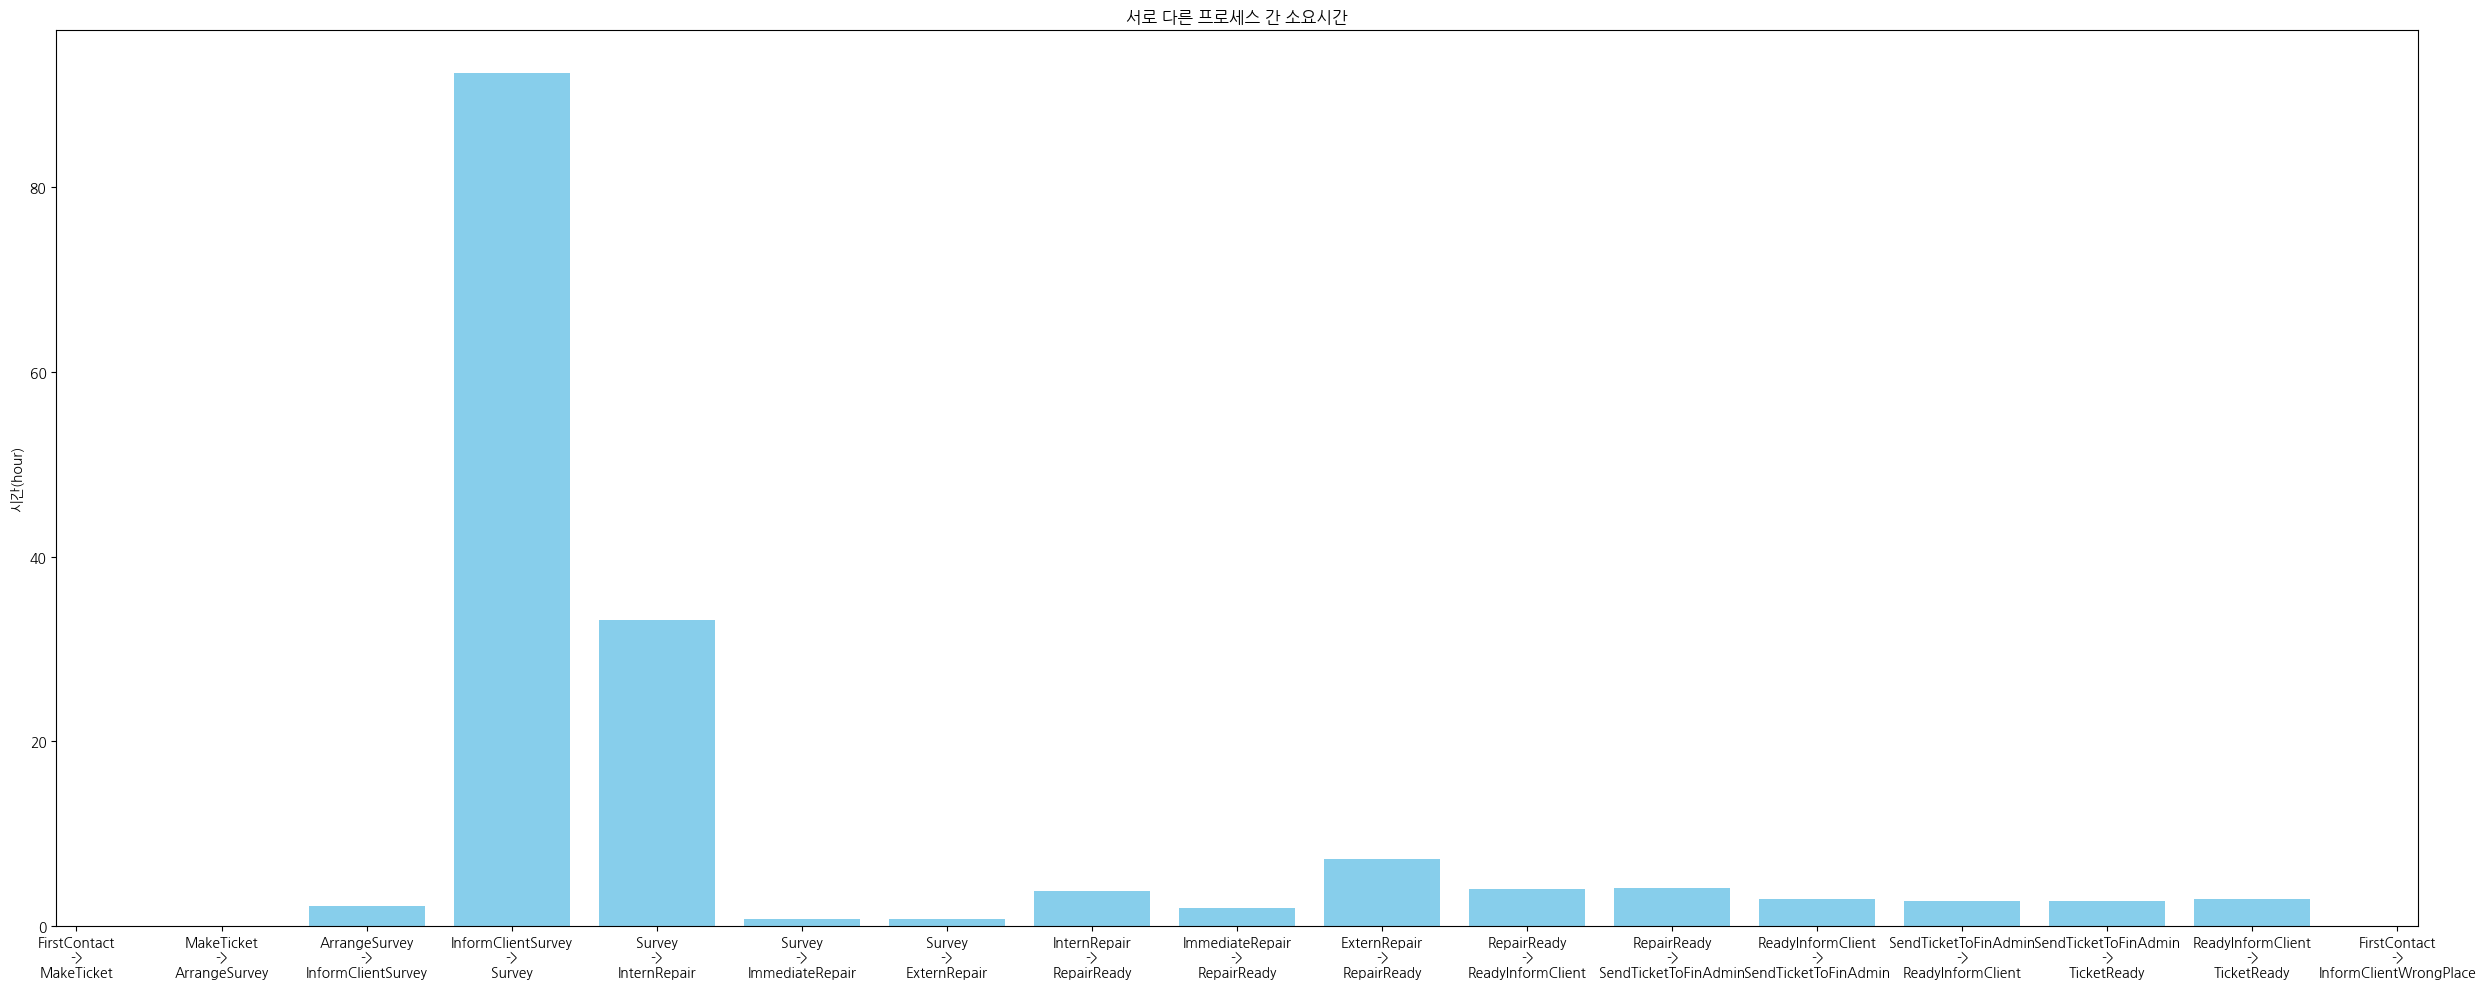

In [350]:
import koreanize_matplotlib

plt.figure(figsize = (25, 10))
plt.bar(x_tick_list, [i/3600 for i in mean_second_list], color='skyblue')
plt.title('서로 다른 프로세스 간 소요시간')
plt.ylabel('시간(hour)')
plt.tight_layout()
plt.show()

# InformClientSurvey -> Survey와 Survey -> InternRepair 작업 사이 소요시간이 너무 크다

In [ ]:
# 서로 같은 프로세스 간 소요시간
def same_process_duration(task):
    start_df = df3[(df3['taskID'] == task) & (df3['eventtype'] == 'start')][['caseID', 'taskID', 'eventtype', 'datetime']]
    complete_df = df3[(df3['taskID'] == task) & (df3['eventtype'] == 'complete')][['caseID', 'taskID', 'eventtype', 'datetime']]

    merge_df = pd.merge(start_df, complete_df, left_on='caseID', right_on='caseID', how='inner')
    duration_time = merge_df.apply(lambda x : x['datetime_y'] - x['datetime_x'], axis=1)
    return duration_time.mean()

x_tick_list2 = []
mean_second_list2 = []

for i in start_complete_task:
    mean_duration = same_process_duration(i)
    x_tick_list2.append(i)
    try:
        mean_second_list2.append(mean_duration.total_seconds())
    except:
        mean_second_list2.append(0)
    print(f"{i} : {mean_duration}")

MakeTicket : 0 days 00:04:21.743869209
ArrangeSurvey : 0 days 02:07:36.324324324
Survey : 0 days 00:40:44.879356568
InternRepair : 0 days 03:46:12.900000
ImmediateRepair : 0 days 01:54:50.400000
ExternRepair : nan


In [ ]:
# ExternRepair는 확인 결과 start 밖에 없어서 소요시간 측정이 불가능
df3[df3['taskID'] == 'ExternRepair']

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime,year
1350,110,ExternRepair,FixIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,6:21,1970-01-03 06:21:00,1970.0
2130,172,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08,14:10,1970-01-08 14:10:00,1970.0
2456,198,ExternRepair,FixIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,9:38,1970-01-01 09:38:00,1970.0
3546,285,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08,1:31,1970-01-08 01:31:00,1970.0
4455,358,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-12,12:56,1970-01-12 12:56:00,1970.0
4729,380,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-06,21:31,1970-01-06 21:31:00,1970.0
6641,534,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-04,10:47,1970-01-04 10:47:00,1970.0
6761,543,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-05,2:23,1970-01-05 02:23:00,1970.0
7121,572,ExternRepair,FixIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-13,3:17,1970-01-13 03:17:00,1970.0
7429,597,ExternRepair,FixIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,1:40,1970-01-07 01:40:00,1970.0


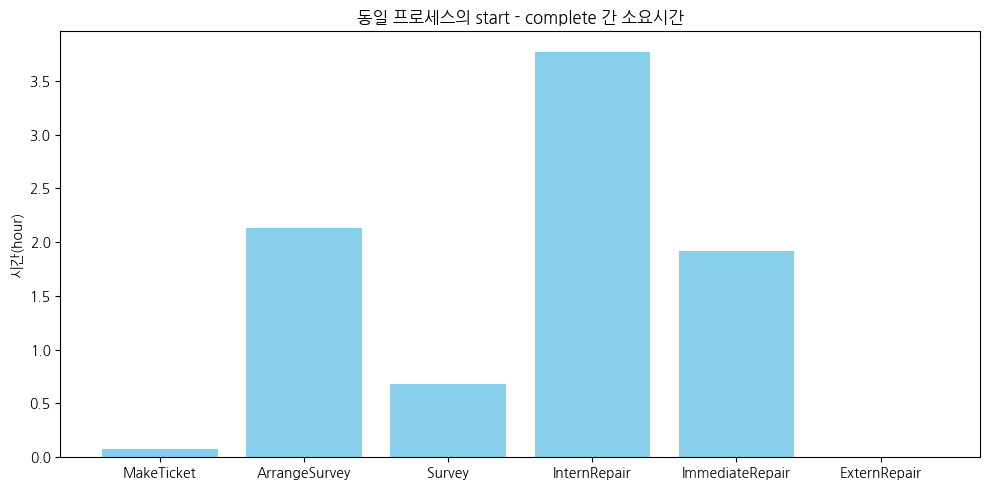

In [ ]:
plt.figure(figsize = (10, 5))
plt.bar(x_tick_list2, [i/3600 for i in mean_second_list2], color='skyblue')
plt.title('동일 프로세스의 start - complete 간 소요시간')
plt.ylabel('시간(hour)')
plt.tight_layout()
plt.show()

# InternRepair의 소요시간이 가장 크다

- InternRepair 작업을 하는데 있어 문제점이 있어보임

### 4. 케이스 소요 시간 파악

- [FirstContact, InformClientWrongPlace]를 제외한 5가지의 프로세스 케이스 소요시간 파악

In [247]:
process1_index = set()
process2_index = set()
process3_index = set()
process4_index = set()
process5_index = set()
for key in process_dict:
    if process_dict[key] == process_count.index[0]:
        process1_index.add(key)
    elif process_dict[key] == process_count.index[1]:
        process2_index.add(key)
    elif process_dict[key] == process_count.index[2]:
        process3_index.add(key)
    elif process_dict[key] == process_count.index[3]:
        process4_index.add(key)
    elif process_dict[key] == process_count.index[5]:
        process5_index.add(key)

process1_df = df3[df3['caseID'].isin(process1_index)]
process2_df = df3[df3['caseID'].isin(process2_index)]
process3_df = df3[df3['caseID'].isin(process3_index)]
process4_df = df3[df3['caseID'].isin(process4_index)]
process5_df = df3[df3['caseID'].isin(process5_index)]

In [248]:
def case_mean_time(df):
    left_df = df[df['taskID'] == 'FirstContact'][['caseID', 'datetime']]
    right_df = df[df['taskID'] == 'TicketReady'][['caseID', 'datetime']]
    merged_df = pd.merge(left_df, right_df, left_on = 'caseID', right_on = 'caseID', how = 'inner')
    return merged_df.apply(lambda x : x['datetime_y'] - x['datetime_x'], axis=1).mean()

- InternRepair(내부 수리)를 하는 프로세스가 평균 5일로 가장 오래 걸린다
- ImmediateRepair(즉시 수리)를 하는 프로세스는 평균 3일이다.
- ExternRepair(외부 수리)를 하는 프로세스는 평균 2일로 가장 적게 걸린다

In [249]:
for index, df in enumerate([process1_df, process2_df, process3_df, process4_df, process5_df]):
    print(f"process{index + 1} : {case_mean_time(df)}")

process1 : 5 days 20:49:01.090909090
process2 : 5 days 02:08:37.431192660
process3 : 3 days 21:01:39.775280898
process4 : 3 days 13:40:51.666666666
process5 : 2 days 18:02:30


#### 4-1. 수리 종류 간 전체 프로세스 소요 시간이 통계적으로 차이가 있는지 확인

In [255]:
InternRepairDF = df3[df3['caseID'].isin(process1_index.union(process2_index))]
ImmediateRepairDF = df3[df3['caseID'].isin(process3_index.union(process4_index))]
ExternRepairDF = df3[df3['caseID'].isin(process5_index)]

1) 분산 분석 (ANOVA)  
μ0 : 내부 수리 케이스 소요 시간의 모평균  
μ1 : 즉시 수리 케이스 소요 시간의 모평균  
μ2 : 외부 수리 케이스 소요 시간의 모평균  
귀무가설(H0) : μ0 == μ1 == μ2 (수리 종류간 케이스 소요 시간에 차이는 없다)  
대립가설(H1) : 적어도 하나의 μi != μj이다 (i != j)  

In [256]:
def time_df(df):
    left_df = df[df['taskID'] == 'FirstContact'][['caseID', 'datetime']]
    right_df = df[df['taskID'] == 'TicketReady'][['caseID', 'datetime']]
    merged_df = pd.merge(left_df, right_df, left_on = 'caseID', right_on = 'caseID', how = 'inner')
    return merged_df.apply(lambda x : x['datetime_y'] - x['datetime_x'], axis=1)

In [257]:
import scipy.stats as stats

intern_times = time_df(InternRepairDF).dt.total_seconds()
immediate_times = time_df(ImmediateRepairDF).dt.total_seconds()
extern_times = time_df(ExternRepairDF).dt.total_seconds()

f_stats, p_value = stats.f_oneway(intern_times, immediate_times, extern_times)

print(f"F 통계량 : {f_stats:.4f}")
print(f"유의확률 : {p_value:.4f}")

# 따라서 유의수준 0.05 하에서 귀무가설을 기각한다 (즉, 적어도 하나의 그룹에서 케이스 소요 시간 차이가 있다)

F 통계량 : 10.7873
유의확률 : 0.0000


2) 사후 검정 (Tukey's HSD)

귀무가설(H0) : gruop1, group2 간 케이스 소요 시간에 차이가 없다  
대립가설(H1) : group1, group2 간 케이스 소요 시간에 차이가 있다  

In [258]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group_labels = (['InternRepair'] * len(intern_times) + ['ImmediateRepair'] * len(immediate_times) + ['extern_times'] * len(extern_times))

all_times = pd.concat([intern_times, immediate_times, extern_times])

tukey_result = pairwise_tukeyhsd(all_times, group_labels, alpha = 0.05)
print(tukey_result)

# InternRepair와의 비교에서 모두 귀무가설을 기각하게 된다.
# 따라서 InternRepair(내부 수리) 케이스가 오래 걸린다고 말할 수 있다.

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
     group1        group2      meandiff   p-adj     lower        upper    reject
--------------------------------------------------------------------------------
ImmediateRepair InternRepair    150410.69 0.0001   64634.2405 236187.1395   True
ImmediateRepair extern_times  -85322.0497 0.5617 -281216.7173  110572.618  False
   InternRepair extern_times -235732.7397 0.0119 -428739.7832 -42725.6963   True
--------------------------------------------------------------------------------


#### 4-2 내부 수리가 왜 오래 걸리는지 확인

1) 각 수리 프로세스를 어떠한 작업자가 하는지 확인

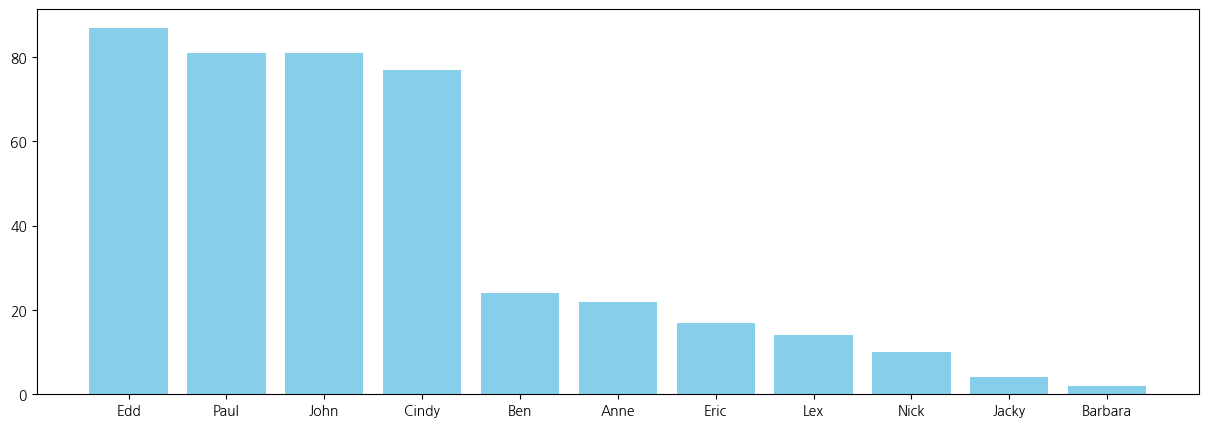

In [ ]:
# InternRepair (내부 수리)
intern_value = InternRepairDF[InternRepairDF['taskID'] == 'InternRepair']['originator'].value_counts()

plt.figure(figsize = (15, 5))
plt.bar(intern_value.index, intern_value.values, color = 'skyblue')
plt.show()

# 여러 작업자가 수리를 하지만 Edd, Paul, John, Cindy에게 작업이 몰림

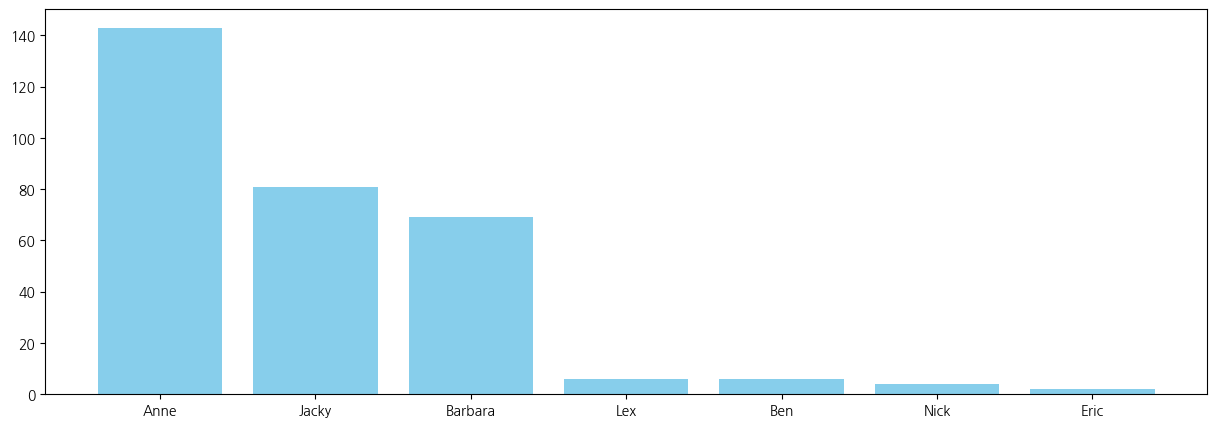

In [273]:
# ImmediateRepair (즉시 수리)
immediate_value = ImmediateRepairDF[ImmediateRepairDF['taskID'] == 'ImmediateRepair']['originator'].value_counts()

plt.figure(figsize = (15, 5))
plt.bar(immediate_value.index, immediate_value.values, color = 'skyblue')
plt.show()

# 마찬가지로 Anne, Jacky, Barbara에게 작업이 몰림

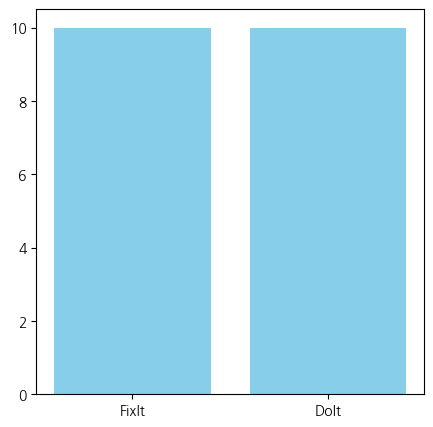

In [312]:
# ExternRepair (외부 수리)
extern_value = ExternRepairDF[ExternRepairDF['taskID'] == 'ExternRepair']['originator'].value_counts()

plt.figure(figsize = (5, 5))
plt.bar(extern_value.index, extern_value.values, color = 'skyblue')
plt.show()

# Fixlt과 Dolt가 반반 나눠서 작업을 맡음

- ExternRepair 프로세스가 빨리 끝나는 이유가 작업자의 업무 분담이 잘 나눠졌고 업무량이 적기 때문

2) 작업자별 업무량 확인

In [323]:
originator_list = df3['originator'].value_counts().index[1:]
for originator in originator_list:
    print(f"---------{originator}---------")
    print(df3[df3['originator'] == originator]['taskID'].value_counts())

---------Monica---------
taskID
MakeTicket                388
ArrangeSurvey             382
FirstContact              239
InformClientWrongPlace     39
Name: count, dtype: int64
---------Dian---------
taskID
ArrangeSurvey             388
MakeTicket                379
FirstContact              224
InformClientWrongPlace     24
Name: count, dtype: int64
---------Anne---------
taskID
Survey             165
ImmediateRepair    143
InternRepair        22
Name: count, dtype: int64
---------Jacky---------
taskID
Survey             92
ImmediateRepair    81
InternRepair        4
Name: count, dtype: int64
---------Paul---------
taskID
Survey          95
InternRepair    81
Name: count, dtype: int64
---------John---------
taskID
Survey          89
InternRepair    81
Name: count, dtype: int64
---------Edd---------
taskID
InternRepair    87
Survey          80
Name: count, dtype: int64
---------Barbara---------
taskID
Survey             86
ImmediateRepair    70
InternRepair        2
Name: count, dtype

사무 작업자 : Monica, Dian  
수리 작업자 : Anne, Jacky, Paul, John, Edd, Barbara, Cindy, Ben, Nick, Eric, Lex, FixIt, DoIt  

In [307]:
def draw_bar_graph(name):
    originator = df3[df3['originator'] == name]['taskID'].value_counts()
    plt.figure(figsize = (10, 5))
    bars = plt.bar(originator.index, originator.values, color = 'skyblue')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval}건', ha='center', va='center')

    plt.show()

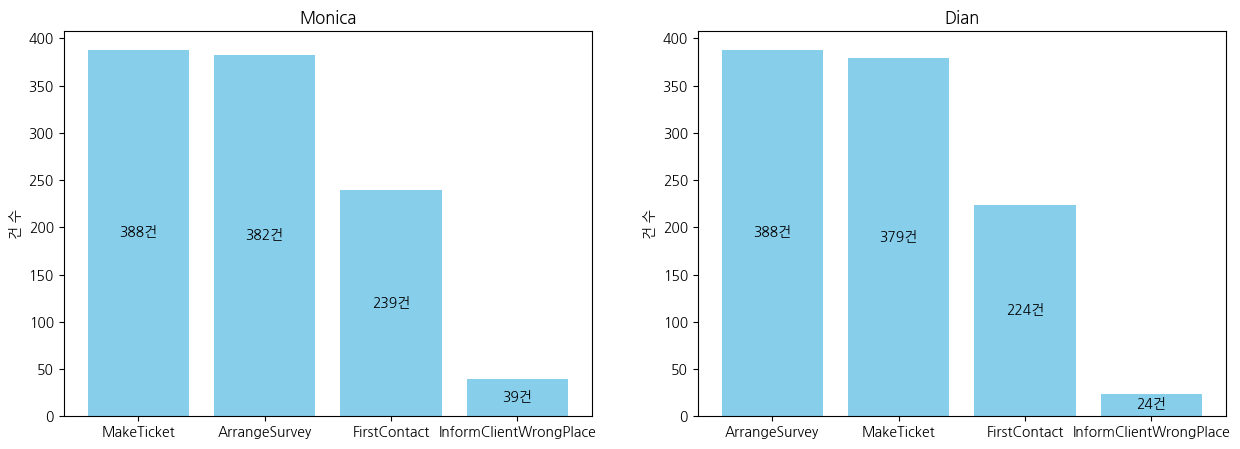

In [332]:
office_worker = ['Monica', 'Dian']
repair_worker = ['Anne', 'Jacky', 'Paul', 'John', 'Edd', 'Barbara', 'Cindy', 'Ben', 'Nick', 'Eric', 'Lex', 'FixIt', 'DoIt']

fig, axs = plt.subplots(1, 2, figsize = (15, 5))

for i in range(2):
    originator = office_worker[i]
    task_counts = df3[df3['originator'] == originator]['taskID'].value_counts()
    bars = axs[i].bar(task_counts.index, task_counts.values, color = 'skyblue')

    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval}건', ha = 'center', va = 'center')

    axs[i].set_title(originator)
    axs[i].set_ylabel('건 수')

plt.show()

In [392]:
print(InternRepairDF[InternRepairDF['RepairInternally'].isna() == False]['RepairInternally'].value_counts())
print(ImmediateRepairDF[ImmediateRepairDF['RepairInternally'].isna() == False]['RepairInternally'].value_counts())
print(ExternRepairDF[ExternRepairDF['RepairInternally'].isna() == False]['RepairInternally'].value_counts())

# InternRepair와 ImmediateRepair는 RepairInternally가 True만 있는걸로 봐서 내부 작업인 것 같은데
# ExternRepair는 외부 작업인데 왜 RepairInternally에 True가 하나 있지?

RepairInternally
True    204
Name: count, dtype: int64
RepairInternally
True    149
Name: count, dtype: int64
RepairInternally
False    19
True      1
Name: count, dtype: int64


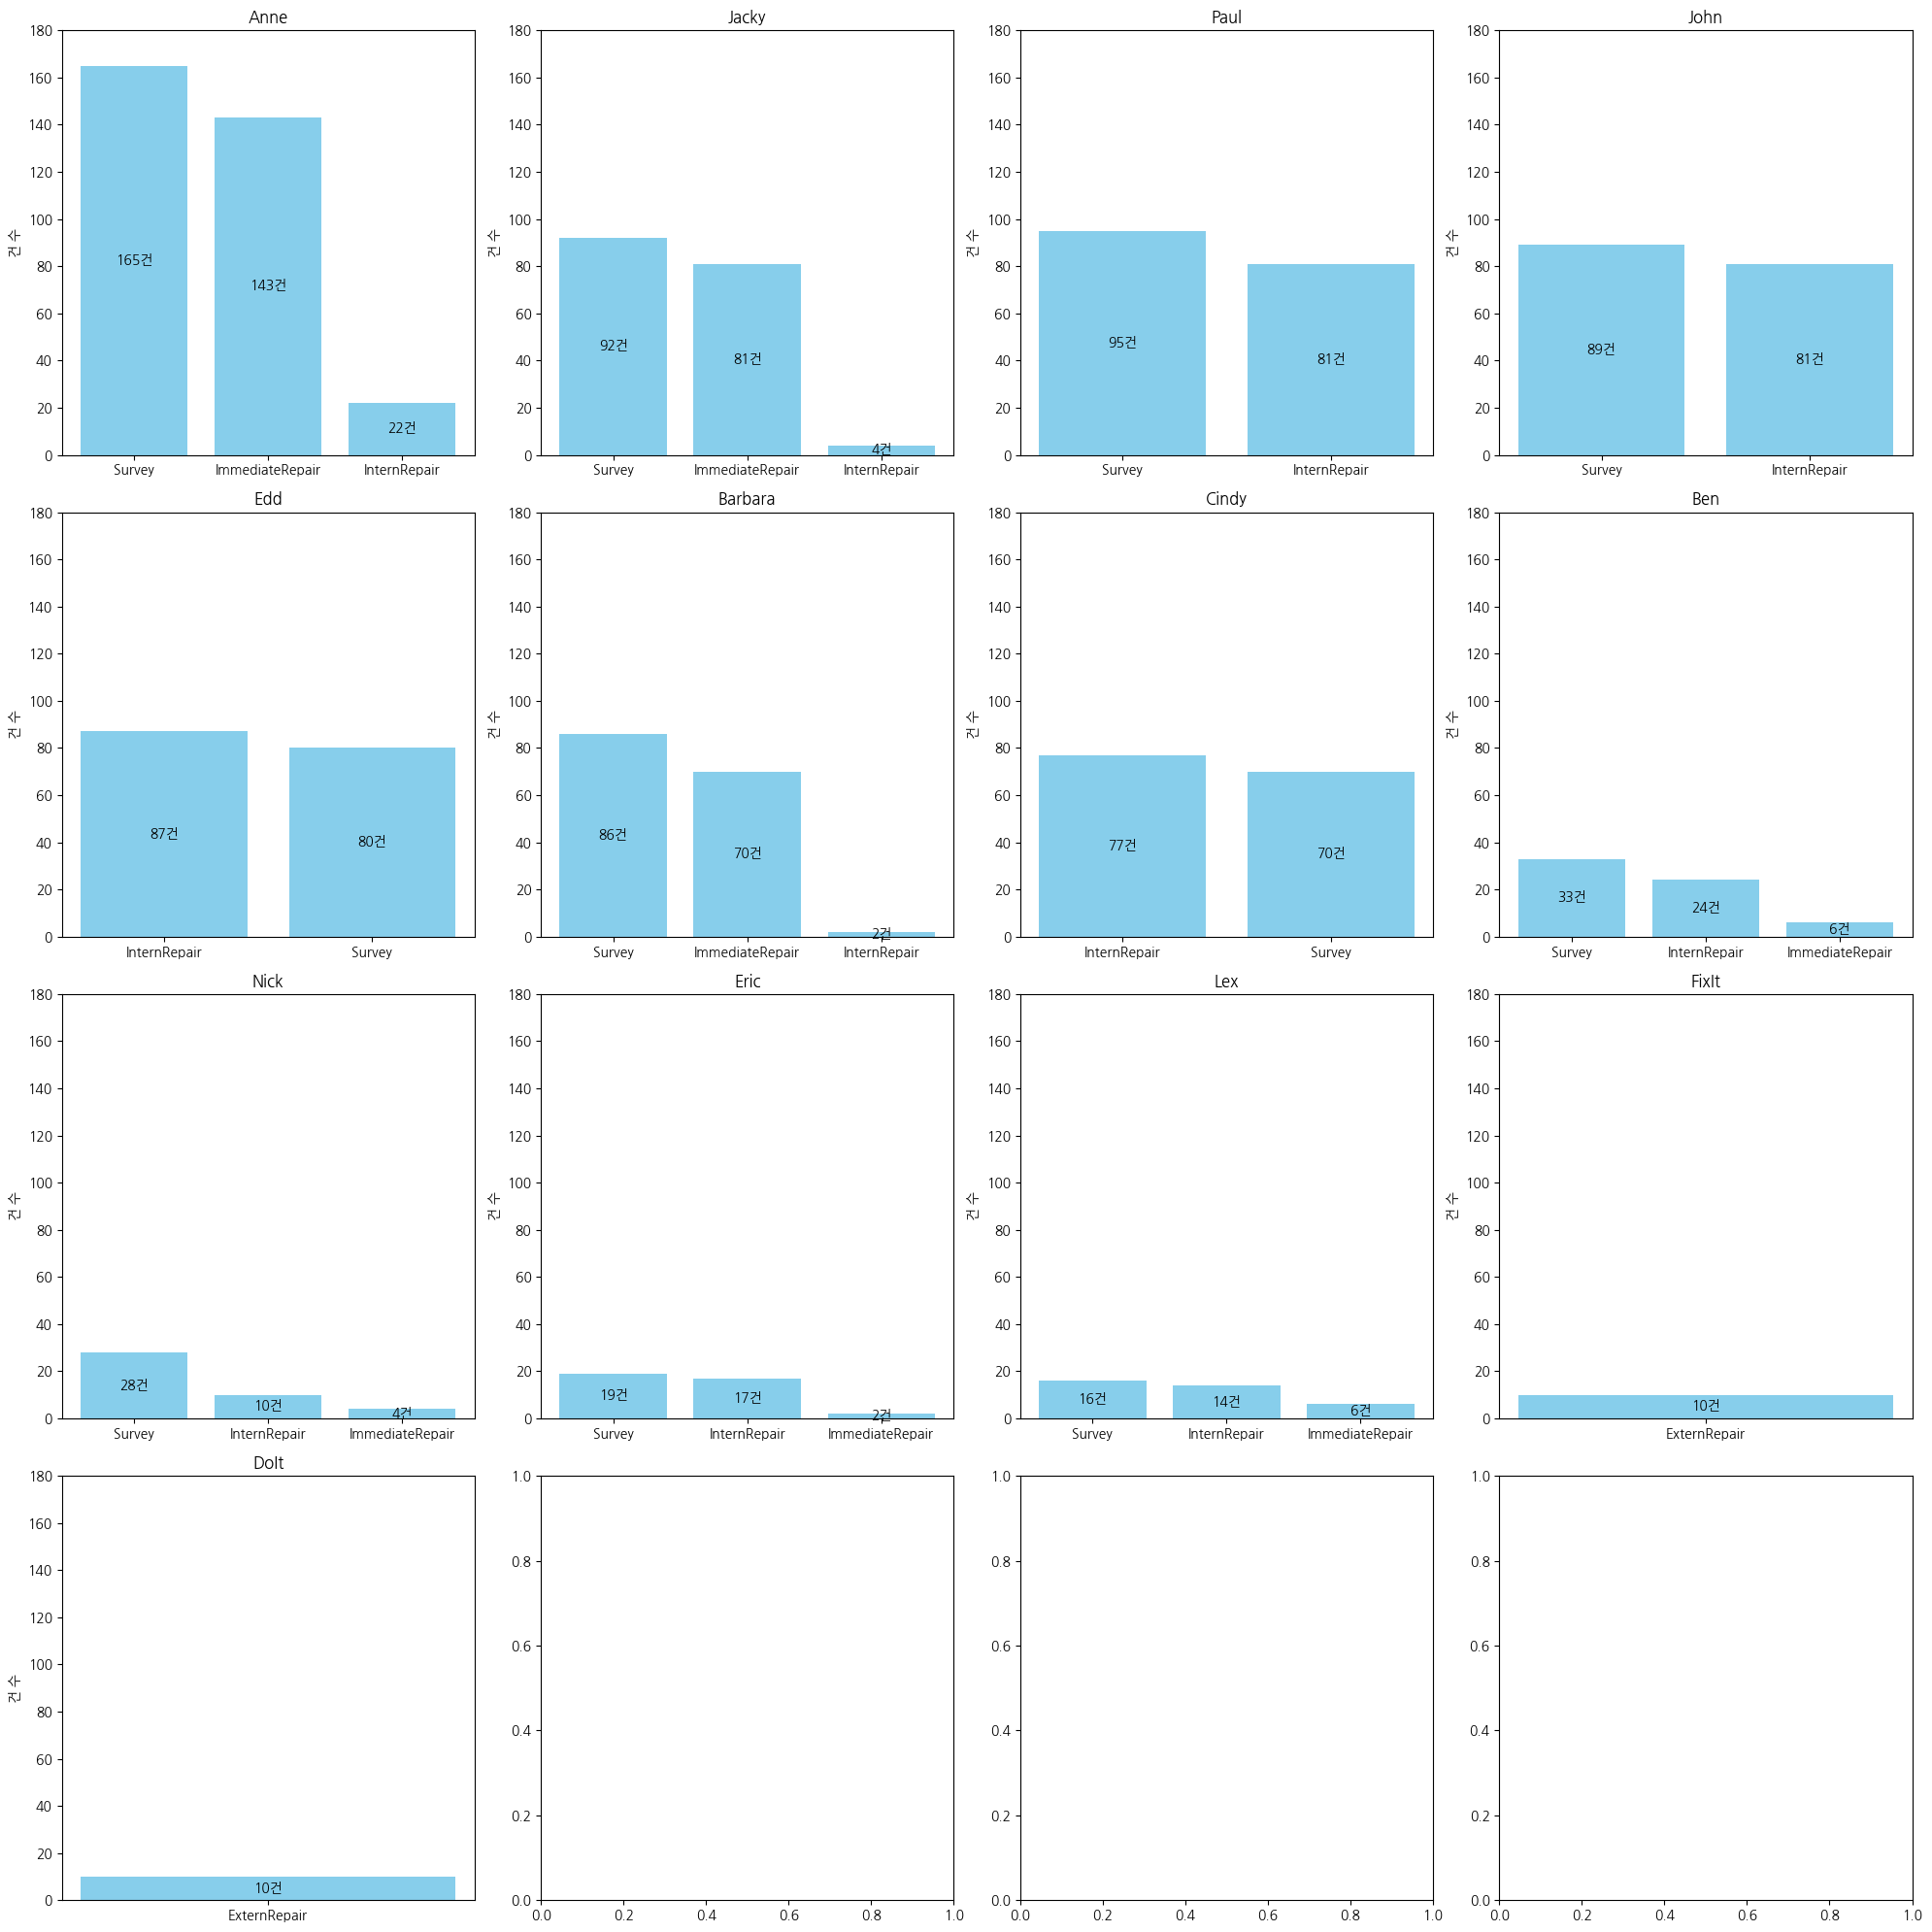

In [347]:
fig, axs = plt.subplots(4, 4, figsize = (20, 20))

for i in range(4):
    for j in range(4):
        if i*4 + j <= 12:
            originator = repair_worker[i*4 + j]
            task_counts = df3[df3['originator'] == originator]['taskID'].value_counts()
            bars = axs[i][j].bar(task_counts.index, task_counts.values, color = 'skyblue')

            for bar in bars:
                yval = bar.get_height()
                axs[i][j].text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval}건', ha = 'center', va = 'center')

            axs[i][j].set_title(originator)
            axs[i][j].set_ylabel('건 수')
            axs[i][j].set_ylim(0, 180)

plt.tight_layout()
plt.show()

# FitIt과 DoIt은 외부 작업자인 것으로 보이고 나머지 작업자들은 내부 작업자로 보임
# 앞서 InformClientSurvey -> Survey간 소요 시간이 많이 걸림
# 시스템이 고객에게 검사 예정 통보를 하고 검사가 시작될 때까지 많은 대기시간이 있는 것으로 생각 됨
# 이는 검사를 진행하는 수리 작업자들의 업무가 많아 검사가 지연되는 것으로 생각 됨
# 따라서 InternRepair와 ImmediateRepair는 작업량을 좀 더 고르게 배분해야 할 것으로 보임

3) 작업자별 평균 작업시간 확인

In [378]:
df3[df3['originator'] == 'Anne']

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime,year
59,5,Survey,Anne,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-09,22:35,1970-01-09 22:35:00,1970.0
60,5,ImmediateRepair,Anne,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-09,23:22,1970-01-09 23:22:00,1970.0
61,5,Survey,Anne,complete,NaN,NaN,NaN,True,120.0,1.0,NaN,1970-01-09,23:22,1970-01-09 23:22:00,1970.0
62,5,ImmediateRepair,Anne,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-10,1:10,1970-01-10 01:10:00,1970.0
209,19,Survey,Anne,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-13,20:49,1970-01-13 20:49:00,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12194,986,Survey,Anne,complete,NaN,NaN,NaN,True,120.0,1.0,NaN,1970-01-08,3:08,1970-01-08 03:08:00,1970.0
12195,986,ImmediateRepair,Anne,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08,5:08,1970-01-08 05:08:00,1970.0
12258,991,Survey,Anne,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-12,1:23,1970-01-12 01:23:00,1970.0
12259,991,ImmediateRepair,Anne,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-12,2:07,1970-01-12 02:07:00,1970.0


In [ ]:
repair_worker = ['Anne', 'Jacky', 'Paul', 'John', 'Edd', 'Barbara', 'Cindy', 'Ben', 'Nick', 'Eric', 'Lex', 'FixIt', 'DoIt']

for worker in repair_worker:
    print(f"{worker} : {df3[df3['originator'] == worker].groupby('caseID')[['datetime']].apply(lambda x : x['datetime'].max() - x['datetime'].min()).mean()}")

# Paul, John, Edd, Cindy의 작업 시간이 다른 작업자들에 비해 오래 걸림
# 업무량이 많아서 그렇거나 작업자의 실력이 부족한 이유 등으로 오래 걸리는 듯
# 작업 시간이 적게 걸리면서 업무량도 적은 내부 작업자인 Ben, Nick, Eric, Lex에게 업무를 늘리고
# Paul, John, Edd, Cindy에게는 업무를 적게 주면서 프로세스 진행 속도에 개선이 있는지 확인하는 것도 좋은 방법이라고 생각함

Anne : 0 days 02:38:01.935483870
Jacky : 0 days 02:30:17.142857142
Paul : 0 days 08:02:25.384615384
John : 0 days 06:16:56.883116883
Edd : 0 days 07:44:59.200000
Barbara : 0 days 02:24:01.363636363
Cindy : 0 days 08:03:22.285714285
Ben : 0 days 02:10:26.086956521
Nick : 0 days 01:35:04
Eric : 0 days 02:20:04.285714285
Lex : 0 days 02:21:30
FixIt : 0 days 00:00:00
DoIt : 0 days 00:00:00


#### 4-3 contact별 케이스 소요 시간 확인

In [393]:
df3['contact'].value_counts()

contact
Web         132
Phone       122
Personal    108
Letter      101
Name: count, dtype: int64

In [406]:
web_index = df3[df3['contact'] == 'Web']['caseID'].values
phone_index = df3[df3['contact'] == 'Phone']['caseID'].values
personal_index = df3[df3['contact'] == 'Personal']['caseID'].values
letter_index = df3[df3['contact'] == 'Letter']['caseID'].values

webDF = df3[df3['caseID'].isin(web_index)]
phoneDF = df3[df3['caseID'].isin(phone_index)]
personalDF = df3[df3['caseID'].isin(personal_index)]
letterDF = df3[df3['caseID'].isin(letter_index)]

In [415]:
contact_list = [webDF, phoneDF, personalDF, letterDF]
name_list = ['Web', 'Phone', 'Personal', 'Letter']

for i in range(4):
    print(f"{name_list[i]} : {contact_list[i].groupby('caseID')[['datetime']].apply(lambda x : x['datetime'].max() - x['datetime'].min()).mean()}")

# contact별 소요시간에는 큰 차이가 없는 것으로 보인다

Web : 3 days 09:05:25.909090909
Phone : 4 days 12:41:34.426229508
Personal : 4 days 01:59:48.888888888
Letter : 4 days 03:15:16.633663366


#### 4-4 contact별 케이스 소요 시간이 통계적으로 차이가 있는지 확인

1) 분산 분석 (ANOVA)  
μ0 : Web의 소요 시간 모평균  
μ1 : Phone의 소요 시간 모평균  
μ2 : Personal의 소요 시간 모평균  
μ3 : Letter의 소요 시간 모평균  
귀무가설(H0) : μ0 == μ1 == μ2 == μ2 (연락 종류간 케이스 소요 시간에 차이는 없다)  
대립가설(H1) : 적어도 하나의 μi != μj이다 (i != j) 

In [425]:
def contact_df(df):
    return df.groupby('caseID')[['datetime']].apply(lambda x : x['datetime'].max() - x['datetime'].min()).dt.total_seconds()

web_times = contact_df(webDF)
phone_times = contact_df(phoneDF)
personal_times = contact_df(personalDF)
letter_times = contact_df(letterDF)

f_stats, p_value = stats.f_oneway(web_times, phone_times, personal_times, letter_times)

print(f"F 통계량 : {f_stats:.4f}")
print(f"유의확률 : {p_value:.4f}")

# 따라서 유의수준 0.05 하에서 귀무가설을 기각할 수 없다 (즉, 모든 연락 종류간 케이스 소요 시간은 차이가 없다)

F 통계량 : 1.6751
유의확률 : 0.1715


##### 4-5 RepairType별 케이스 소요 시간에 차이가 있는지 확인

In [426]:
df3['RepairType'].value_counts()
# E와 P타입이 작업 수가 많고 B가 상대적으로 적다

RepairType
E    162
P    160
B     45
Name: count, dtype: int64

In [443]:
E = df3[df3['caseID'].isin(df3[df3['RepairType'] == 'E']['caseID'])]
print(E['originator'].value_counts())
# System, Monica, Dian을 제외한 수리 작업자들을 봤을때
# Paul, Edd, John, Cindy만 E 작업을 한다. 이는 앞서 시간이 오래 걸리는 작업자의 목록과 같다
# 즉, E타입의 작업이 시간이 오래 걸리는 작업이라고 생각할 수 있다 (대략 7시간 정도 소요)
print()
P = df3[df3['caseID'].isin(df3[df3['RepairType'] == 'P']['caseID'])]
print(P['originator'].value_counts())
# 다음으로 P타입은 주로 Anne, Jacky, Barbara가 하는데 모두 대략 2시간 30분 정도의 작업 시간을 가졌다
print()
B = df3[df3['caseID'].isin(df3[df3['RepairType'] == 'B']['caseID'])]
print(B['originator'].value_counts())
# 마지막으로 B타입은 업무량이 제일 적었던 Ben, Nick, Lex, Eric이 하는데 작업 시간은 P타입과 비슷하지만 업무량이 적다

# 시간이 많이 걸리는 E타입의 작업이 가능한 인원을 추가로 고용해야 할 것 같다

originator
System    810
Monica    402
Dian      398
Paul      168
Edd       163
John      162
Cindy     128
Name: count, dtype: int64

originator
System     800
Monica     404
Dian       381
Anne       297
Jacky      159
Barbara    139
DoIt         7
FixIt        5
Name: count, dtype: int64

originator
System    225
Monica    114
Dian      109
Ben        59
Nick       38
Lex        34
Eric       31
FixIt       4
DoIt        3
Name: count, dtype: int64
